Se solucionará con:

$ \frac{d\mathbf{p}}{dt} = \sum_{i} \mathbf{F} $

*momento cohete*:
$ p = m(t)v(t) $

$ \frac{d\mathbf{p}}{dt} = m\frac{d\mathbf{m}}{dt} + v\frac{d\mathbf{v}}{dt} $

$ d\mathbf{p} = m\, d\mathbf{m} + v\, d\mathbf{v} $

*momento por el combustible*:

$ \frac{d\mathbf{p}}{dt} = -\frac{d\mathbf{m}}{dt}(v-v_{\text{escp}}) $

En esta ecuación:
- $ \mathbf{p} $ es el momento,
- $ \mathbf{m} $ es la masa cohete,
- $ \mathbf{v} $ es la velocidad,
- $ v_{\text{escp}} $ es la velocidad de escape del combustible, y
- $ t $ es el tiempo.

*todo junto*:

$ \frac{d\mathbf{p}}{dt} = m\frac{d\mathbf{v}}{dt} + v_{\text{escp}}\frac{d\mathbf{m}}{dt} $

*Fuerzas*:
- gravedad
- fricción

$ \sum_{i} \mathbf{F} = -mg - bv^2 $

*Igualar diferencia de momento con sumatoria de fuerzas*:

$ m\frac{d\mathbf{v}}{dt} + v_{\text{escp}}\frac{d\mathbf{m}}{dt} = -mg - bv^2$

$ \frac{d\mathbf{v}}{dt} = -v_{\text{escp}}\frac{d\mathbf{m}}{dt}\frac{1}{m(t)} -g -
\frac{\mathbf{bv^2$}}{m(t)}$


**Para encontrar la funcion de desplazamiento se deberia integrar**
**la ecuacion diferencial para el dezplazamiento seria**


$ \mathbf{s = (x,v)}, \frac{d\mathbf{s}}{dt} = (\frac{d\mathbf{x}}{dt},\frac{d\mathbf{v}}{dt})$



**Nuestras constantes son**


- $ \mathbf{m} $ es la masa cohete,
- $ v_{\text{escp}} $ es la velocidad de escape del combustible, y
- $ g $ Gravedad.
- $ b $ friccion por el aire
- $ dmdt $ Tasa de cambio de la masa


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


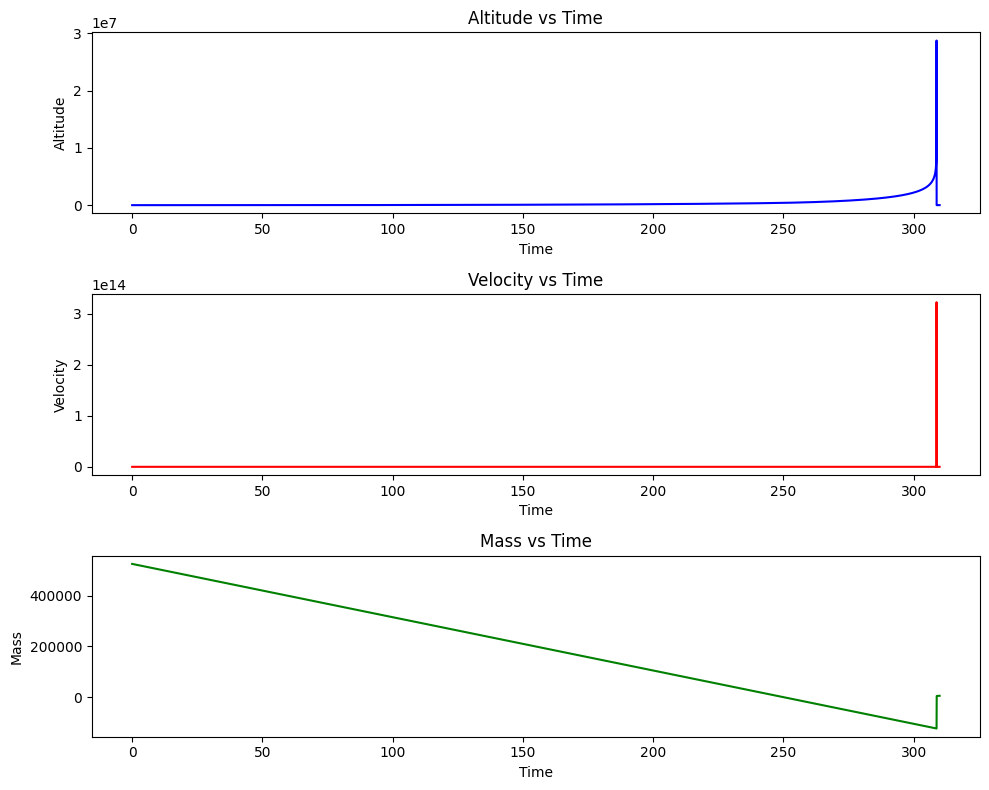

In [137]:
import numpy as np
from scipy.integrate import odeint


g = 9.81
ve = 3100


mdot = -2100

b = 0.1
ti = 0
tf = 310
t = np.linspace(ti, tf, 10000)

def f(x, t):
    m, y, v = x
    return [mdot, v, -mdot/m*ve - g - b*(v**2)/m]

# initial condition
m0 = 525000
y0 = 0
v0 = 0
x0 = [m0, y0, v0]

X = odeint(f, x0, t)



import matplotlib.pyplot as plt

# Extracting altitude, velocity, and mass from X
altitude = X[:, 1]
velocity = X[:, 2]
mass = X[:, 0]

# Plotting altitude, velocity, and mass
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, altitude, 'b')
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.title('Altitude vs Time')

plt.subplot(3, 1, 2)
plt.plot(t, velocity, 'r')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity vs Time')

plt.subplot(3, 1, 3)
plt.plot(t, mass, 'g')
plt.xlabel('Time')
plt.ylabel('Mass')
plt.title('Mass vs Time')

plt.tight_layout()
plt.show()





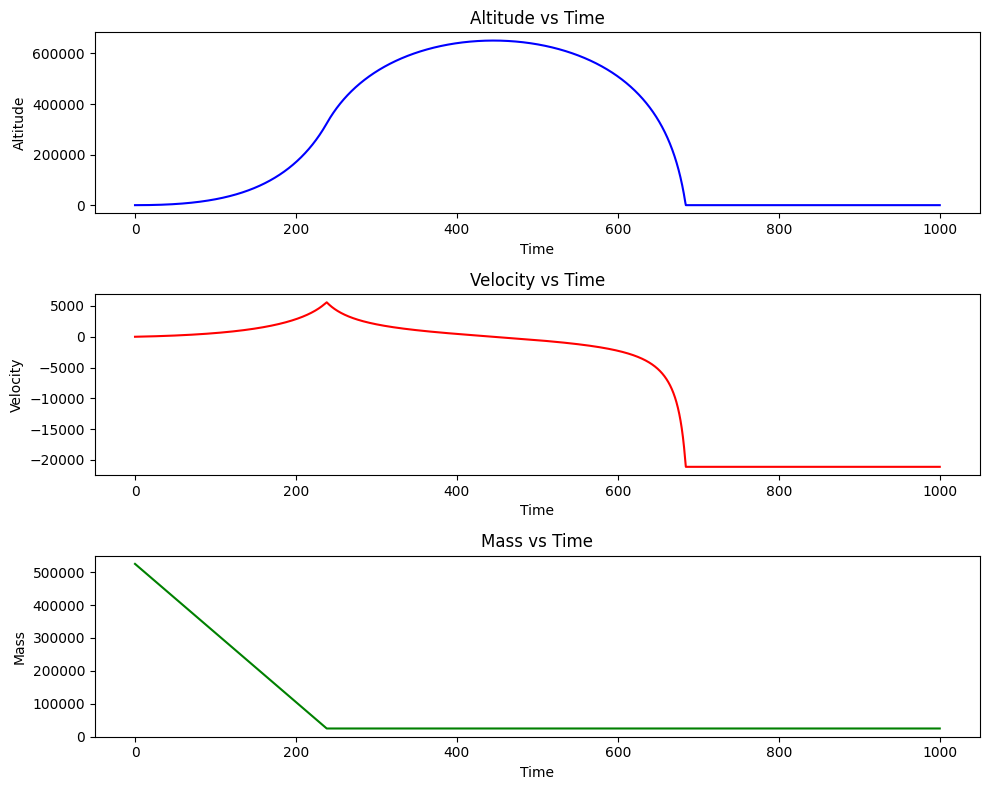

In [195]:
import numpy as np
from scipy.integrate import odeint



g = 9.81
ve = 3100


mdot = -2100

b = 0.1
ti = 0
tf = 1000
t = np.linspace(ti, tf, 10000)

def f(x, t):
    m, y, v = x
    if m > mcohete :
      dxdt = v
      dvdt = -mdot/m*ve - g - b*(v**2)/m
      dmdt = mdot
    else:
      dxdt = v
      dvdt = - g - b*(v**2)/mcohete
      dmdt = 0
    if (dvdt<0)and (dxdt<0)and (y<=0):
      dxdt=0
      dvdt=0
    return [dmdt, dxdt, dvdt]

# initial condition
#masa cohete con combustible
m0 = 525000
#masa combustible
mf = 500000
mcohete = m0-mf
y0 = 0
v0 = 0
x0 = [m0, y0, v0]

X = odeint(f, x0, t)



import matplotlib.pyplot as plt

# Extracting altitude, velocity, and mass from X
altitude = X[:, 1]
velocity = X[:, 2]
mass = X[:, 0]

# Plotting altitude, velocity, and mass
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, altitude, 'b')
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.title('Altitude vs Time')

plt.subplot(3, 1, 2)
plt.plot(t, velocity, 'r')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity vs Time')

plt.subplot(3, 1, 3)
plt.plot(t, mass, 'g')
plt.xlabel('Time')
plt.ylabel('Mass')
plt.title('Mass vs Time')

plt.tight_layout()
plt.show()


import gc

# Recolectar basura para liberar memoria
gc.collect()

# Limpiar el espacio de nombres local
locals().clear()


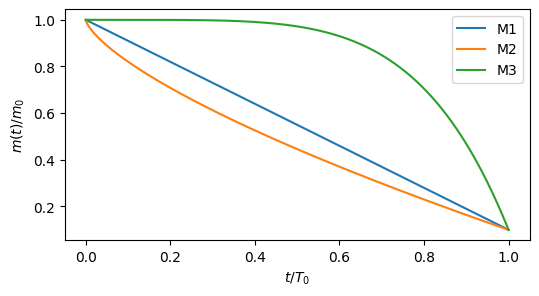

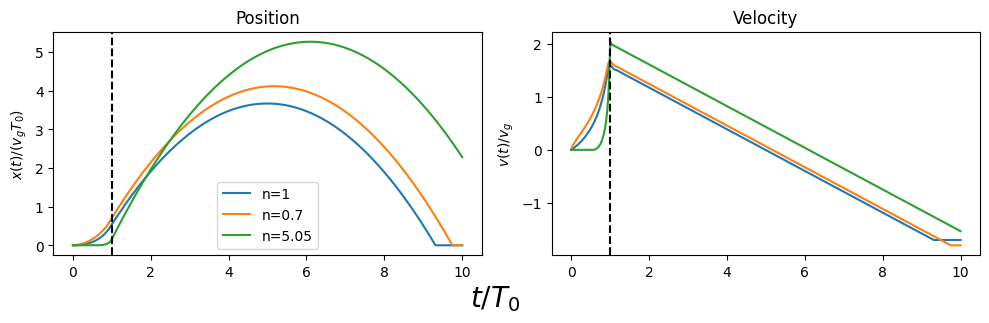

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp
import sympy as smp
T0 = 40 # 40 second launch
g = 9.81
vg = 500 # fuel emitted at 500m/s
M0 = 2e4 #20000kg rocket starting
b = 0.1 # coefficient of air friction
m0 = M0/(b*vg*T0)
m0 = np.inf
t, n = smp.symbols('t n')
z = 1-(9/10)*t**n
t, n = smp.symbols('t n')
z = 1-(9/10)*t**n
dzdt = smp.diff(z, t).simplify()
# Get numerical functions
z = smp.lambdify([t, n], z)
dzdt = smp.lambdify([t, n], dzdt)
t = np.linspace(1e-4, 1, 1000)
z1 = z(t, 1)
z2 = z(t, 0.7)
z3 = z(t, 5)
plt.figure(figsize=(6,3))
plt.plot(t, z1, label='M1')
plt.plot(t, z2, label='M2')
plt.plot(t, z3, label='M3')
plt.ylabel('$m(t)/m_0$')
plt.xlabel('$t/T_0$')
plt.legend()
plt.show()
def dSdt(t,S, m0, vg, n, T0=40):
    x, v = S[0], S[1]
    # If still have fuel left (at t=1 all fuel is expelled)
    if t<1:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(t,n))*v**2 *np.sign(v) - 1/z(t, n) * dzdt(t, n)
    # If out of fuel
    else:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(1,n))*v**2 *np.sign(v)
    # If accelerating downwards with negative speed while on the ground (can't go through ground)
    if (dvdt<0)*(dxdt<0)*(x<=0):
        dxdt=0
        dvdt=0
    return [dxdt,dvdt]
n1, n2, n3 = 1, 0.7, 5.05
sol1 = solve_ivp(dSdt, [1e-4, 10], y0=[0,0], t_eval=np.linspace(1e-4,10,1000), args=(m0, vg, n1, T0))
sol2 = solve_ivp(dSdt, [1e-4, 10], y0=[0,0], t_eval=np.linspace(1e-4,10,1000), args=(m0, vg, n2, T0))
sol3 = solve_ivp(dSdt, [1e-4, 10], y0=[0,0], t_eval=np.linspace(1e-4,10,1000), args=(m0, vg, n3, T0))
fig, axes = plt.subplots(1, 2, figsize=(10,3))
ax = axes[0]
ax.plot(sol1.t, sol1.y[0], label='n={}'.format(n1))
ax.plot(sol2.t, sol2.y[0], label='n={}'.format(n2))
ax.plot(sol3.t, sol3.y[0], label='n={}'.format(n3))
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$x(t)/(v_g T_0)$')
ax.set_title('Position')
ax.legend()
ax = axes[1]
ax.plot(sol1.t, sol1.y[1], label='n=1')
ax.plot(sol2.t, sol2.y[1], label='n=0.7')
ax.plot(sol3.t, sol3.y[1], label='n=1.3')
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$v(t)/v_g$')
ax.set_title('Velocity')
fig.text(0.5, -0.04, '$t/T_0$', ha='center', fontsize=20)
fig.tight_layout()